In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sstats

%matplotlib inline

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)


In [3]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [4]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

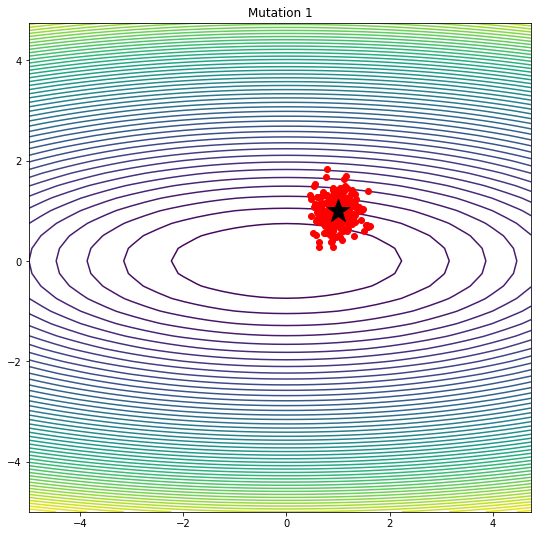

In [5]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [6]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

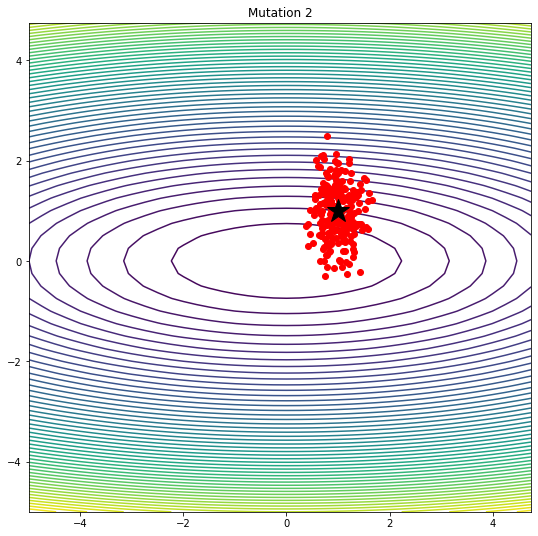

In [7]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [94]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

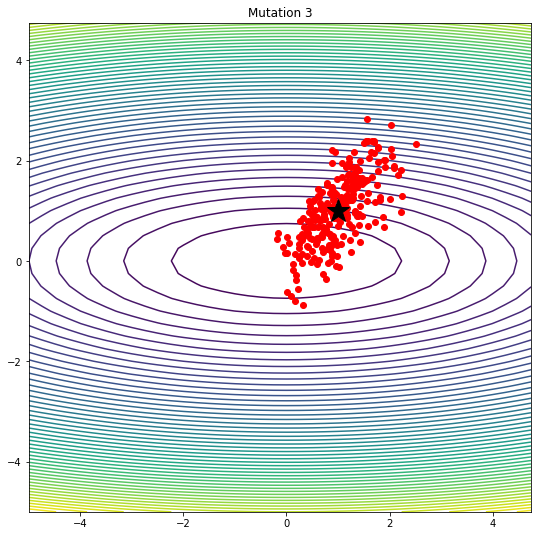

In [9]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## a), b), F1_a

In [10]:
def mut_statistics(hist, bests, num):
    h_x = np.array(list(hist.keys()))
    h_y = np.array(list(hist.values())) / num
    I = np.flip(np.argsort(h_y))
    print(f'Tried {num} times')
    print('Best mutations and it\'s average num of better individuals:')
    df = pd.DataFrame(list(zip(h_x[I], h_y[I])), columns = ["mutation", 'Average better points (out of 250)'])
    print(df)
    #print(bests)
    #y_pos = np.arange(len(h_y))
    
    #plt.figure(figsize = (12,5))
    #plt.xlabel("Mutations")
    #plt.ylabel("Average better points")
    #plt.ylim((0,3 * 1e-3))
    #_ = plt.xticks(y_pos, labels = h_x)
    #_ = plt.bar(y_pos, h_y, color = ['c', 'm', 'y', 'k', 'orange', 'tomato', 'sienna', 'olivedrab', 'mediumseagreen', 'teal', 'lightblue'])

    y_pos = np.arange(bests.shape[1])    
    plt.figure(figsize = (15,5))
    _ = plt.xticks(y_pos, labels = y_pos)
    plt.xlabel("Iteration")
    plt.ylabel("Objective value of best individual")
    y_pos = np.arange(bests.shape[1]) - 0.2
    _ = plt.bar(y_pos, bests[0, :], width = 0.2, color = ['c'], label = 'mutation 1')
    y_pos = np.arange(bests.shape[1])
    _ = plt.bar(y_pos, bests[1, :], width = 0.2, color = ['tomato'], label = 'mutation 2')
    y_pos = np.arange(bests.shape[1]) + 0.2
    _ = plt.bar(y_pos, bests[2, :], width = 0.2, color = ['olivedrab'], label = 'mutation 3')
    plt.legend()

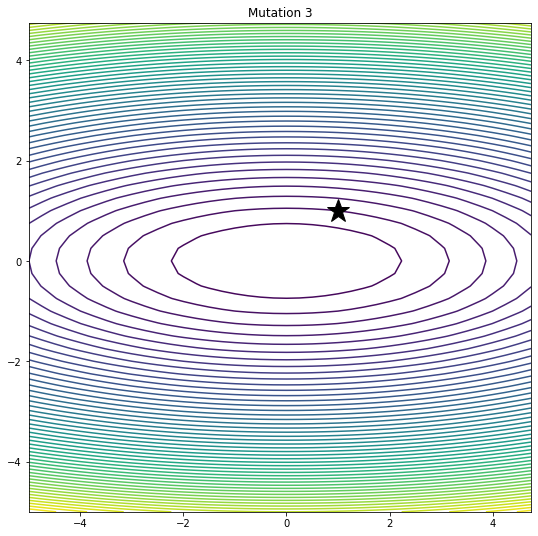

In [11]:
N = 250
d = 2
num = 50
objective_function = objective_function_F1a
original_individual = np.array([[1, 1]])

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

hist = {1:0, 2:0, 3:0}
bests = np.zeros((3, num))
for i in range(num):
    sigma = 0.25
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[1] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[0, i] = max(objective_function(mutations))
    
    sigma = np.array([0.25, 0.5])
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[2] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[1, i] = max(objective_function(mutations))
    
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    hist[3] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[2, i] = max(objective_function(mutations))

Tried 50 times
Best mutations and it's average num of better individuals:
   mutation  Average better points (out of 250)
0         2                              123.04
1         1                              122.36
2         3                              121.70


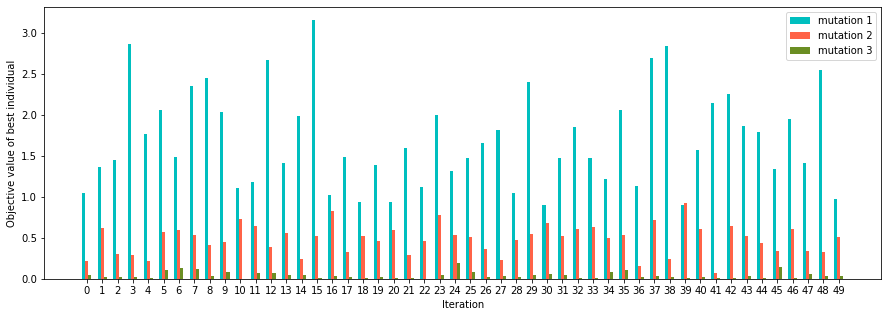

In [12]:
mut_statistics(hist, bests * (-1), num)

## c), F1, F6, F1B, F1_C

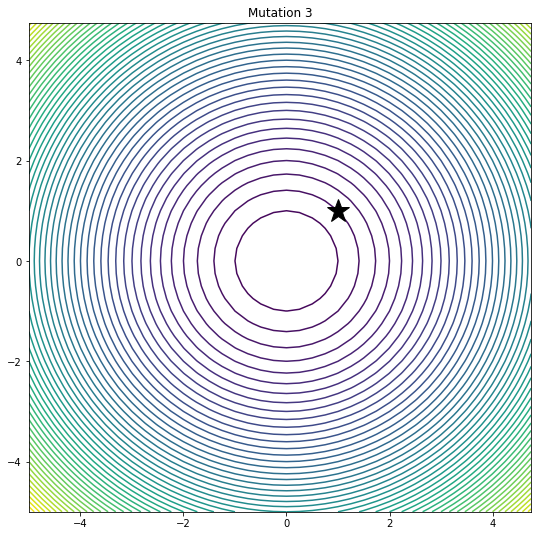

In [13]:
N = 250
d = 2
num = 50
objective_function = objective_function_F1
original_individual = np.array([[1, 1]])

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

hist = {1:0, 2:0, 3:0}
bests = np.zeros((3, num))
for i in range(num):
    sigma = 0.25
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[1] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[0, i] = max(objective_function(mutations))
    
    sigma = np.array([0.25, 0.5])
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[2] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[1, i] = max(objective_function(mutations))
    
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    hist[3] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[2, i] = max(objective_function(mutations))

Tried 50 times
Best mutations and it's average num of better individuals:
   mutation  Average better points (out of 250)
0         3                              120.02
1         1                              116.16
2         2                              115.14


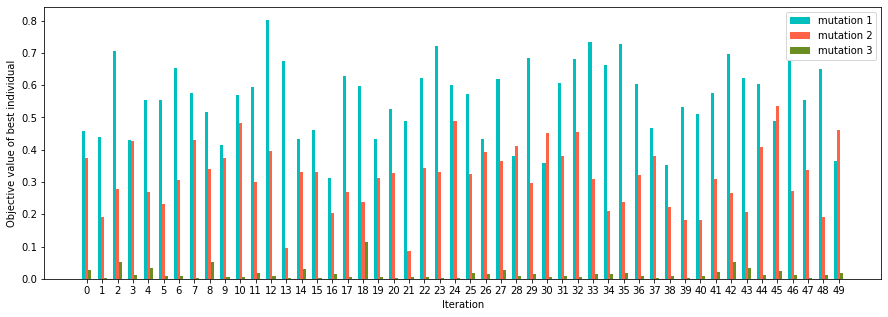

In [14]:
mut_statistics(hist, bests * (-1), num)

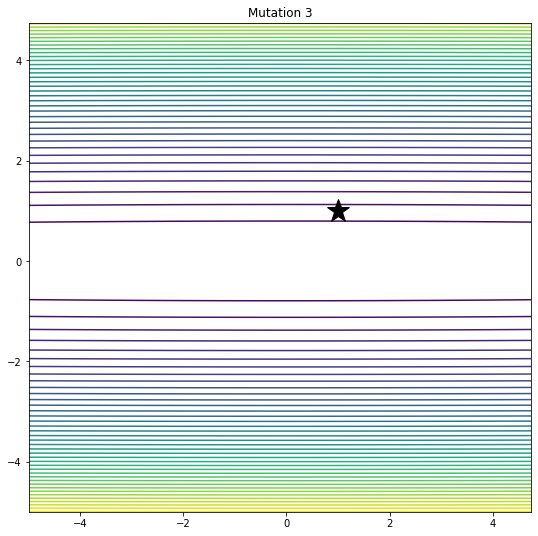

In [15]:
N = 250
d = 2
num = 50
objective_function = objective_function_F1b
original_individual = np.array([[1, 1]])

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

hist = {1:0, 2:0, 3:0}
bests = np.zeros((3, num))
for i in range(num):
    sigma = 0.25
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[1] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[0, i] = max(objective_function(mutations))
    
    sigma = np.array([0.25, 0.5])
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[2] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[1, i] = max(objective_function(mutations))
    
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    hist[3] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[2, i] = max(objective_function(mutations))

Tried 50 times
Best mutations and it's average num of better individuals:
   mutation  Average better points (out of 250)
0         3                              126.44
1         2                              125.54
2         1                              124.34


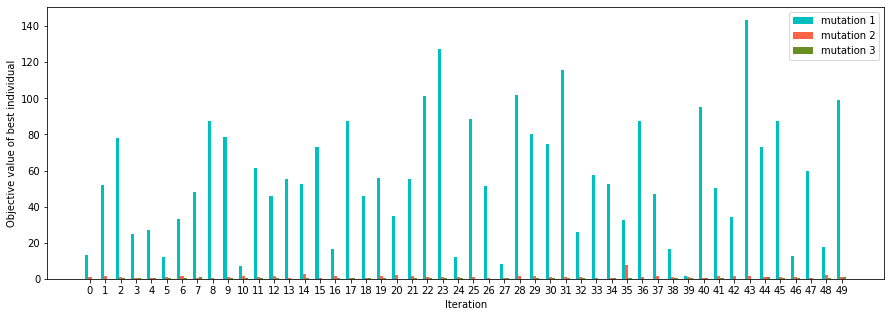

In [16]:
mut_statistics(hist, bests * (-1), num)

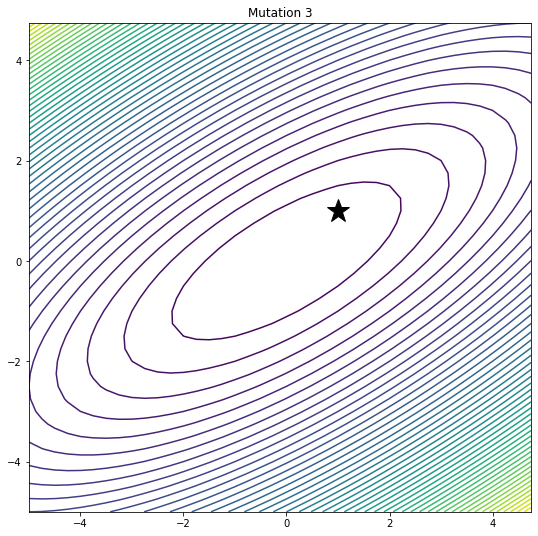

In [17]:
N = 250
d = 2
num = 50
objective_function = objective_function_F1c
original_individual = np.array([[1, 1]])

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

hist = {1:0, 2:0, 3:0}
bests = np.zeros((3, num))
for i in range(num):
    sigma = 0.25
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[1] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[0, i] = max(objective_function(mutations))
    
    sigma = np.array([0.25, 0.5])
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[2] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[1, i] = max(objective_function(mutations))
    
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    hist[3] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[2, i] = max(objective_function(mutations))

Tried 50 times
Best mutations and it's average num of better individuals:
   mutation  Average better points (out of 250)
0         3                              107.46
1         1                              107.36
2         2                              105.92


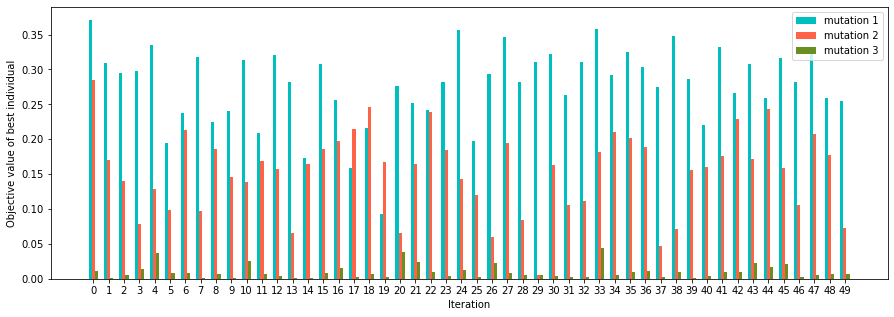

In [18]:
mut_statistics(hist, bests * (-1), num)

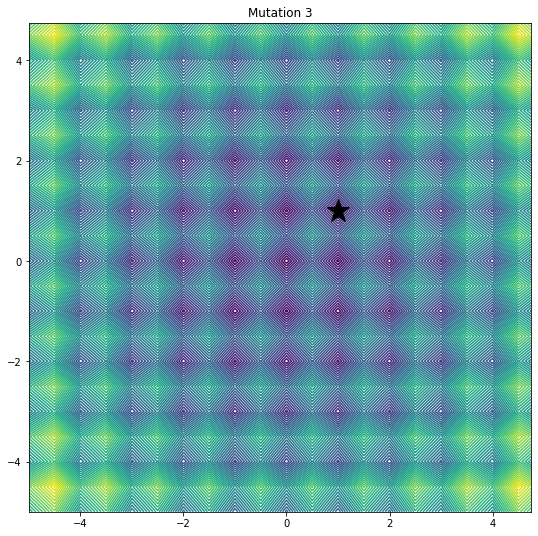

In [19]:
N = 250
d = 2
num = 50
objective_function = objective_function_F6
original_individual = np.array([[1, 1]])

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

hist = {1:0, 2:0, 3:0}
bests = np.zeros((3, num))
for i in range(num):
    sigma = 0.25
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[1] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[0, i] = max(objective_function(mutations))
    
    sigma = np.array([0.25, 0.5])
    mutations = original_individual + sigma * np.random.randn(N, d)
    
    hist[2] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[1, i] = max(objective_function(mutations))
    
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    
    hist[3] += sum(objective_function(mutations) > objective_function(original_individual))
    bests[2, i] = max(objective_function(mutations))

Tried 50 times
Best mutations and it's average num of better individuals:
   mutation  Average better points (out of 250)
0         3                                1.28
1         2                                0.72
2         1                                0.10


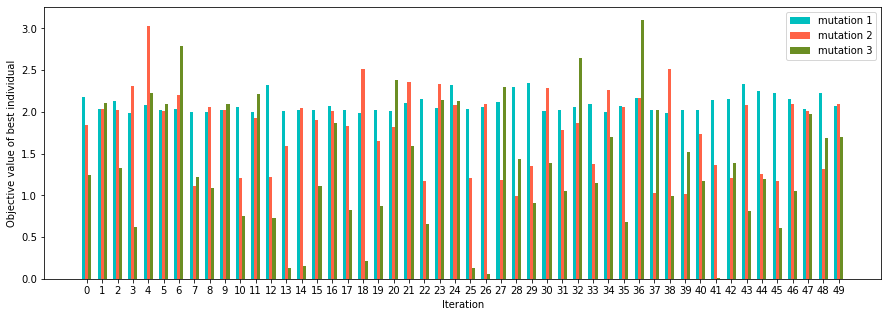

In [20]:
mut_statistics(hist, bests * (-1), num)

## d) Rozklad Cholesky'ego macierzy kowariancji
używany jest w mutacji 3, aby wygenerować wielowymiarowy rozkład normalny x = mu + AZ (Z - wektor n niezaleznych zmiennych losowych)
potrzebujemy rozbicia sigma = A * A.T ; rozkład Cholesky'ego możemy szybko obliczyć

## e)
Referaty wyjaśniające przekształcenie gęstości w formę kwadratową, a następnie w formę elipsy

Rozbicie rozkładu na formę kwadratową
https://www.michaelchughes.com/blog/2013/01/why-contours-for-multivariate-gaussian-are-elliptical/

https://geostatisticslessons.com/pdfs/errorellipses.pdf

dowód, że kwadrat dystansu Mahalanobisa ma rozkład Chi kwadrat
https://markusthill.github.io/mahalanbis-chi-squared/

dokładne wyprowadzenie percentylu:
https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/

https://online.stat.psu.edu/stat505/lesson/4/4.6

W skrócie:
Szukamy rozwiązań wszystkich możliwych (x1,x2), takich że p(x1,x2) <= c
Zauważmy, że wartość p zależy od wykładnika e (tam są x1,x2)
W takim razie możemy zapisać:

$L(x) = (x - \mu)^T\Sigma^{-1}(x-\mu)$
następnie podstawiając $x' = x - \mu$

$L(x) = x'^T\Sigma^{-1}x'$

Z własnośći macierzy kowariancji (symetryczna, dodatnio określona) istnieje odwrotność $\Sigma$. Skoro $\Sigma$ jest dodatnio określona to jej odwrotność również. To wystarcza do dekompozycji:

$\Sigma = U\Lambda U^T$ - gdzie $U$ to macierz wektorów własnych ortogonalnych -> $U$ jest macierzą obrotu bo ortogonalna i wyznacznik róþwny 1, a $\lambda_i > 0$

$L(x) = x'^T\Sigma^{-1}x' = x'^TU\Lambda U^Tx'$ , $x'' = U^Tx'$

$x'^TU\Lambda U^Tx' = x''^T\Lambda x''$

W takim razie po przekształceniach (translacja o wektor $\mu$ oraz obrót o wektor $U$ otrzymaliśmy formę kwadratową - formę elipsy:

$L(x'') = \sum^{2}_{d = 1}\lambda_dx''^2_d$

$C = \lambda_1x''^2_1 + \lambda_2x''^2_2$

czyli $1 = \frac{x''^2_1}{a^2} + \frac{x''^2_1}{b^2}$ , gdzie $a^2 = \frac{C}{\lambda_1}, b^2 = \frac{C}{\lambda_2}$

Zatem długościami osi wielkiej i małej będzię $2a$ i $2b$ , a równanie parametryczne ma postać:

$x = a\cos(t)$ , $y = b\sin(t)$ , $t \in [0,2\pi)$

Jak obliczyć C? C to nasza wartość, określająca ile punktów ma wpaść do elipsy. Chcemy, żeby 

$P(\lambda_1x''^2_1 + \lambda_2x''^2_2 \leq C) = 0.95$

Okazuje się, że kwadrat dystansu Mahalanobisa ma rozkład Chi kwadrat z k stopniami swobody (gdzie k to ilość zmiennych, u nas 2), zatem kwantyl C:

$C = F^{-1}_{\chi ^2_2}(0.95)$

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [143]:
N = 250
d = 2

#kwantyl
c = sstats.chi2.ppf(0.95, d)
print(c)

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

5.991464547107979


[16. 16.] [[1. 0.]
 [0. 1.]]
Dlugosciami osi wielkiej i malej są odpowiednio: 1.2239, 1.2239


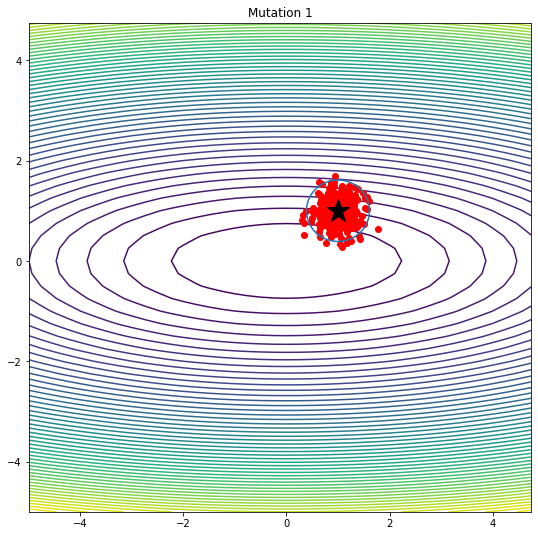

In [147]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

# środek elipsy to translacja 0 + mu i obrót nie wpływa na jego położenie
u, v = 1. , 1.

# osie elipsy to wg obliczeń:
S = np.array([[sigma ** 2, 0], [0, sigma ** 2]])
l,w = np.linalg.eig(np.linalg.inv(S))
print(l , w)
a = np.sqrt(c / l[0])
b = np.sqrt(c / l[1])
print(f'Dlugosciami osi wielkiej i malej są odpowiednio: {2 * a:.4f}, {2 * b:.4f}')

#wyznaczamy wspolrzedne elipsy poprzez nalozenie obrotu
# w tym wypadku nie obracalismy - wiec macierz obrotu [w1,w2] = U jest Identycznosciowa
t = np.linspace(0, 2 * np.pi, 100)

R = w # macierza obrotu sa wektory wlasne
X_prim = np.vstack([a * np.cos(t), b*np.sin(t)]) # wspolrzedne przed obrotem  itranslacja
#obrot (tutaj jest to Id)
XY = R @ X_prim
XX = XY[0, :] + u
YY = XY[1, :] + v

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)

plt.plot(XX, YY)

plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

[16.  4.] [[1. 0.]
 [0. 1.]]
Dlugosciami osi wielkiej i malej są odpowiednio: 1.2239, 2.4477


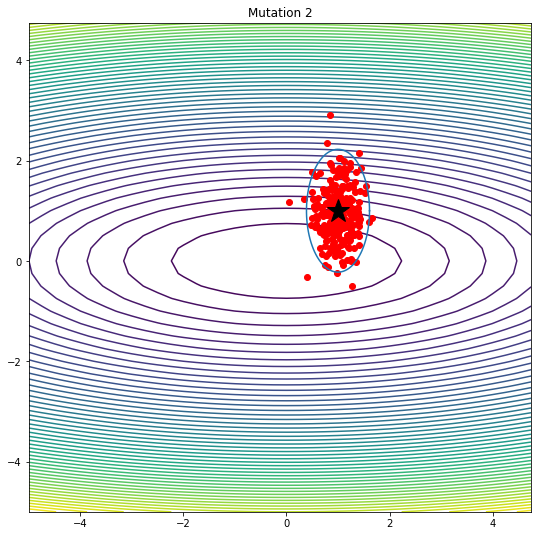

In [148]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

# środek elipsy to translacja 0 + mu i obrót nie wpływa na jego położenie
u, v = 1. , 1.

# osie elipsy to wg obliczeń:
S = np.array([[sigma[0] ** 2, 0], [0, sigma[1] ** 2]])
l,w = np.linalg.eig(np.linalg.inv(S))
print(l , w)
a = np.sqrt(c / l[0])
b = np.sqrt(c / l[1])
print(f'Dlugosciami osi wielkiej i malej są odpowiednio: {2 * a:.4f}, {2 * b:.4f}')

#wyznaczamy wspolrzedne elipsy poprzez nalozenie obrotu
# w tym wypadku nie obracalismy - wiec macierz obrotu [w1,w2] = U jest Identycznosciowa
t = np.linspace(0, 2 * np.pi, 100)

R = w # macierza obrotu sa wektory wlasne
X_prim = np.vstack([a * np.cos(t), b*np.sin(t)]) # wspolrzedne przed obrotem  itranslacja
#obrot (tutaj jest to Id)
XY = R @ X_prim
XX = XY[0, :] + u
YY = XY[1, :] + v

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)

plt.plot(XX, YY)

plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

[10.47213595  1.52786405] [[ 0.85065081  0.52573111]
 [-0.52573111  0.85065081]]
Dlugosciami osi wielkiej i malej są odpowiednio: 1.5128, 3.9605


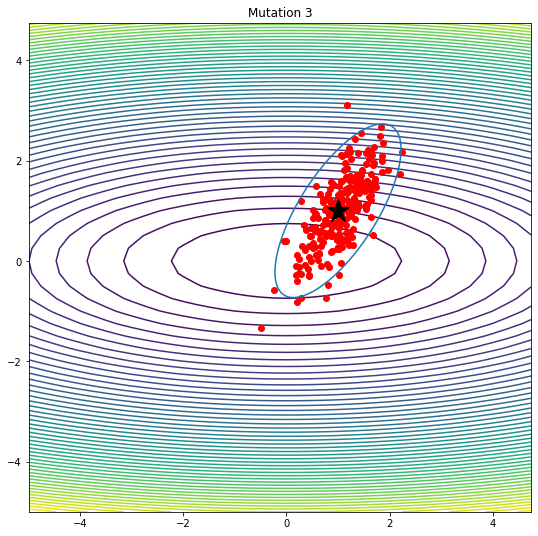

In [149]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

# środek elipsy to translacja 0 + mu i obrót nie wpływa na jego położenie
u, v = 1. , 1.

# osie elipsy to wg obliczeń:
S = S # tutaj mamy podana macierz kowariancji wprost
l,w = np.linalg.eig(np.linalg.inv(S))
print(l , w)
a = np.sqrt(c / l[0])
b = np.sqrt(c / l[1])
print(f'Dlugosciami osi wielkiej i malej są odpowiednio: {2 * a:.4f}, {2 * b:.4f}')

#wyznaczamy wspolrzedne elipsy poprzez nalozenie obrotu
# w tym wypadku nie obracalismy - wiec macierz obrotu [w1,w2] = U jest Identycznosciowa
t = np.linspace(0, 2 * np.pi, 100)

R = w # macierza obrotu sa wektory wlasne
X_prim = np.vstack([a * np.cos(t), b*np.sin(t)]) # wspolrzedne przed obrotem  itranslacja
#obrot (tutaj jest to Id)
XY = R @ X_prim
XX = XY[0, :] + u
YY = XY[1, :] + v

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.plot(XX, YY)

plt.title('Mutation 3')
plt.show()